# Julia

2.00000000000000


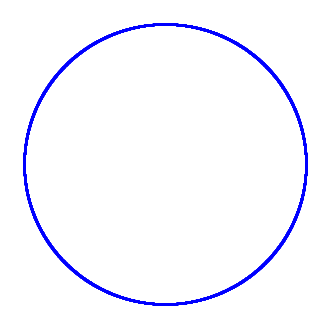

In [20]:
from sympy import re, im, sqrt, I
from random import random

# Parameters
a,b = 0, 0 #1.1  # To plot J(a,b).
k = 15
num_iterations = 2**k

def julia(X):
    x, y = X
    x1, y1 = x, y
    u = sqrt((x1-a)**2 + (y1-b)**2) / 2
    v = (x - a) / 2
    u1, v1 = sqrt(u + v), sqrt(u - v)
    xn, yn = u1, v1
    if y1 < b:
        yn = -yn
    if random() < 0.5:
        xn, yn = -u1, -yn
    return (xn, yn)

x1 = (re(0.5 + sqrt(0.25 - (a + b*I)))).expand(complex=True)
y1 = (im(0.5 + sqrt(0.25 - (a + b*I)))).expand(complex=True)
is_unstable = 2 * abs(x1 + y1*I)
print(is_unstable)

X0 = [x1, y1]
X, Y = [], []
for i in range(num_iterations):
    xn, yn = julia(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X, Y, color='blue', s=0.15)
ax.axis('off')
plt.show()


/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_56396/4250964663.py:11: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_56396/4250964663.py:11: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


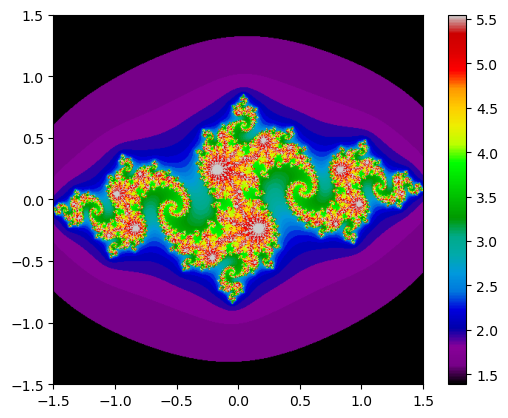

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(c, xlim, ylim, res, max_iter):
    x = np.linspace(xlim[0], xlim[1], res[0])
    y = np.linspace(ylim[0], ylim[1], res[1])
    X, Y = np.meshgrid(x, y)
    img = np.zeros(X.shape, dtype=float)
    Z = X + 1j * Y
    for i in range(max_iter):
        Z = Z**2 + c
        mask = np.abs(Z) < 1000
        img += mask
    img = np.log(img + 1)
    return img

# Define parameters
c = -0.8 + 0.156j
#c=0*c
xlim = (-1.5, 1.5)
ylim = (-1.5, 1.5)
res = (500, 500)
max_iter = 256

# Generate Julia set and plot
img = julia_set(c, xlim, ylim, res, max_iter)
plt.imshow(img, extent=(xlim + ylim), cmap='nipy_spectral')
plt.colorbar()
plt.show()


In [22]:
import matplotlib.pyplot as plt

# List all available colormaps
colormaps = plt.colormaps()
print(colormaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_56396/2999917434.py:11: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_56396/2999917434.py:11: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


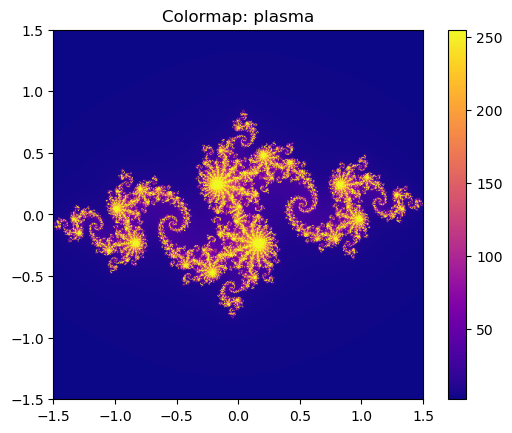

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def julia_set(c, xlim, ylim, res, max_iter):
    x = np.linspace(xlim[0], xlim[1], res[0])
    y = np.linspace(ylim[0], ylim[1], res[1])
    X, Y = np.meshgrid(x, y)
    img = np.zeros(X.shape, dtype=float)
    Z = X + 1j * Y
    for i in range(max_iter):
        Z = Z**2 + c
        mask = np.abs(Z) < 1000
        img[mask] = i
    return img

# Define parameters
c = -0.8 + 0.156j
xlim = (-1.5, 1.5)
ylim = (-1.5, 1.5)
res = (500, 500)
max_iter = 256

# Generate Julia set and plot
n_color=2
img = julia_set(c, xlim, ylim, res, max_iter)
plt.imshow(img, extent=(xlim + ylim), cmap=colormaps[n_color])
plt.title(f"Colormap: {colormaps[n_color]}")
plt.colorbar()
plt.show()


## Mandelbrot

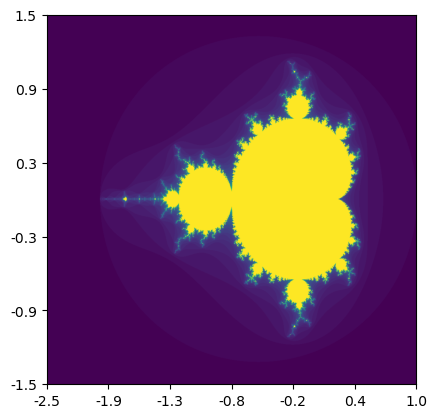

In [16]:
# Program 15c: The Mandelbrot set.
# See Figure 15.3.

xmin, xmax = -2.5, 1
ymin, ymax = -1.5, 1.5
xrange, yrange = xmax-xmin, ymax-ymin

def mandelbrot(h,w, max_iter=50):
     y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
     c = x + y*1j
     z = c
     div_iter = max_iter + np.zeros(z.shape, dtype=int)

     for i in range(max_iter):
         z = z**2 + c
         div_test = z*np.conj(z) > 2**2
         div_num = div_test & (div_iter == max_iter)
         div_iter[div_num] = i
         z[div_test] = 2

     return div_iter  # Number of iterations to diverge

scale = 1000  # Amount of detail in the set

# Set the tick labels to the Argand plane
fig, ax = plt.subplots()
ax.imshow(mandelbrot(scale,scale))
xtick_labels = np.linspace(xmin, xmax, int(xrange / 0.5))
ax.set_xticks([(x-xmin) / xrange * scale for x in xtick_labels])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])
ytick_labels = np.linspace(ymin, ymax, int(yrange / 0.5))
ax.set_yticks([-(y+ymin) / yrange * scale for y in ytick_labels])
ax.set_yticklabels(['{:.1f}'.format(ytick) for ytick in ytick_labels])
plt.show()

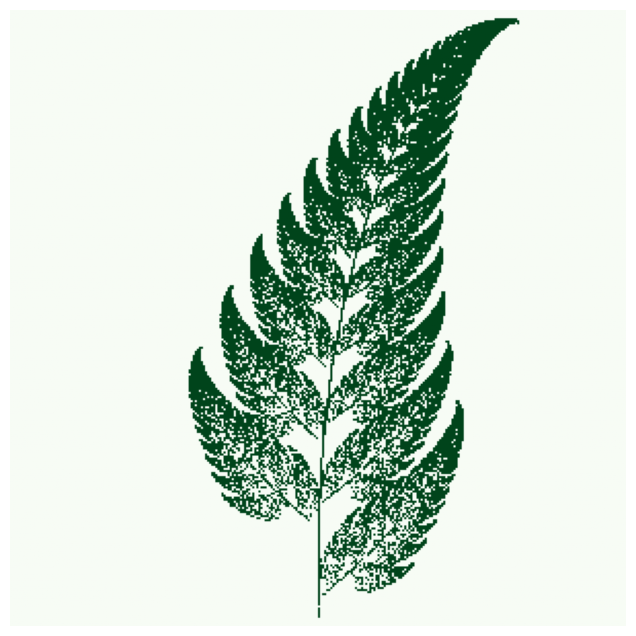

In [17]:
# Program 17c: Barnsley's fern.
# See Figure 17.7.
#import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.cm as cm

# The transformation T
f1 = lambda x, y: (0.0, 0.2*y)
f2 = lambda x, y: (0.85*x + 0.05*y, -0.04*x + 0.85*y + 1.6)
f3 = lambda x, y: (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)
f4 = lambda x, y: (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)
fs = [f1, f2, f3, f4]

num_points = 60000

width = height = 300
fern = np.zeros((width, height))

x, y = 0, 0
for i in range(num_points):
    # Choose a random transformation
    f = np.random.choice(fs, p=[0.01, 0.85, 0.07, 0.07])
    x, y = f(x,y)
    # Map (x,y) to pixel coordinates
    # Center the image
    cx, cy = int(width / 2 + x * width / 10), int(y * height / 10)
    fern[cy, cx] = 1

fig, ax=plt.subplots(figsize=(8,8))
plt.imshow(fern[::-1,:], cmap=cm.Greens)
ax.axis('off')
plt.show()


See also https://www.dynamicmath.xyz/mandelbrot-julia/